In [1]:
print("all ok")

all ok


In [10]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)

Project root added to path: c:\Users\CS\Desktop\LLMOps\automated-research-report-generation


In [4]:
from research_and_analyst.utils.model_loader import ModelLoader


In [5]:
model_loader = ModelLoader()

{"timestamp": "2025-10-25T02:23:52.696466Z", "level": "warning", "event": "OPENAI_API_KEY is missing from environment"}
{"timestamp": "2025-10-25T02:23:52.700156Z", "level": "info", "event": "GOOGLE_API_KEY loaded from environment"}
{"timestamp": "2025-10-25T02:23:52.703146Z", "level": "info", "event": "GROQ_API_KEY loaded from environment"}
{"timestamp": "2025-10-25T02:23:52.705140Z", "level": "info", "event": "ASTRA_DB_API_ENDPOINT loaded from environment"}
{"timestamp": "2025-10-25T02:23:52.708135Z", "level": "info", "event": "ASTRA_DB_APPLICATION_TOKEN loaded from environment"}
{"timestamp": "2025-10-25T02:23:52.711745Z", "level": "info", "event": "ASTRA_DB_KEYSPACE loaded from environment"}
{"config_keys": ["astra_db", "embedding_model", "retriever", "llm"], "timestamp": "2025-10-25T02:23:52.727705Z", "level": "info", "event": "YAML config loaded"}


In [6]:
llm=model_loader.load_llm()

{"provider": "google", "model": "gemini-2.0-flash", "timestamp": "2025-10-25T02:23:56.042515Z", "level": "info", "event": "Loading LLM"}


In [7]:
llm.invoke("hi").content

'Hi there! How can I help you today?'

In [8]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

In [9]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage,HumanMessage , SystemMessage
from langgraph.checkpoint.memory import MemorySaver

#health

Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),
        

Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."



),
Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [23]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [25]:
analyst = Analyst(
    name="CS",
    role="genai eng",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [26]:
analyst.name

'CS'

In [27]:
analyst.role

'genai eng'

In [28]:
analyst.affiliation

'AI Research LAB'

In [29]:
print(analyst.persona)

Name: CS
Role: genai eng
Affiliation: AI Research LAB
Description: I am genai developer as well as mentor



In [40]:
class Perspectives(BaseModel):
       analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [30]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [31]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [56]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [57]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [58]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']

In [59]:
structured_llm= llm.with_structured_output(Perspectives)

In [42]:
structured_llm.invoke('You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.')

AttributeError: 'str' object has no attribute 'items'

In [60]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}
    

In [61]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 5,
    'human_analyst_feedback': 'give the real info'}
    )

{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on preventative healthcare and the impact of public health policies on community well-being. Concerned with health equity and access to care for underserved populations.'),
  Analyst(name='Dr. Michael Chen', role='Healthcare Economist', affiliation='Harvard Medical School', description='Analyzes healthcare costs, insurance models, and the economic impact of healthcare regulations. Motivated by finding sustainable and efficient healthcare financing solutions.'),
  Analyst(name='Dr. Sarah Johnson', role='Medical Technology Innovator', affiliation='Stanford Bioengineering', description='Develops and evaluates new medical technologies, including AI-driven diagnostics and robotic surgery. Driven by the potential to improve patient outcomes and reduce invasiveness of treatments.'),
  Analyst(name='Dr. David Rodriguez', role='Pharmaceutical Industry

{'analysts': [Analyst(name='Dr. Emily Carter', role='Public Health Researcher', affiliation='National Institutes of Health', description='Focuses on preventative healthcare and the impact of public health policies on community well-being. Concerned with health equity and access to care for underserved populations.'),
  Analyst(name='Dr. Michael Chen', role='Healthcare Economist', affiliation='Harvard Medical School', description='Analyzes healthcare costs, insurance models, and the economic impact of healthcare regulations. Motivated by finding sustainable and efficient healthcare financing solutions.'),
  Analyst(name='Dr. Sarah Johnson', role='Medical Technology Innovator', affiliation='Stanford Bioengineering', description='Develops and evaluates new medical technologies, including AI-driven diagnostics and robotic surgery. Driven by the potential to improve patient outcomes and reduce invasiveness of treatments.'),
  Analyst(name='Dr. David Rodriguez', role='Pharmaceutical Industry Analyst', affiliation='Global Pharma Corp', description='Focuses on drug development, clinical trials, and the market dynamics of the pharmaceutical industry. Concerned with bringing innovative and cost-effective treatments to market.'),
  Analyst(name='Dr. Maria Hernandez', role='Healthcare Policy Advisor', affiliation='Department of Health and Human Services', description='Advises on healthcare policy and regulatory issues, including healthcare reform and access to care. Motivated by creating a more equitable and effective healthcare system for all citizens.')]}

In [54]:
create_analyst(
    {'topic': 'finance',
    'max_analysts': 5,
    'human_analyst_feedback': 'give the real info'}
    )

{'analysts': [Analyst(name='Ava Sharma', role='Quantitative Analyst', affiliation='Hedge Fund X', description='Focuses on developing and backtesting algorithmic trading strategies. Concerned with market volatility and risk management. Motivated by maximizing returns through data-driven insights.'),
  Analyst(name='Ben Carter', role='Financial Regulation Specialist', affiliation='Regulatory Compliance Agency Y', description='Specializes in analyzing and interpreting financial regulations. Concerned with ensuring market stability and preventing illicit financial activities. Motivated by maintaining ethical standards and protecting investors.'),
  Analyst(name='Chloe Davis', role='Investment Strategist', affiliation='Global Investment Bank Z', description='Develops investment strategies based on macroeconomic trends and market analysis. Concerned with identifying growth opportunities and managing portfolio risk. Motivated by achieving long-term capital appreciation for clients.'),
  Analy

In [62]:
def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

In [63]:
def should_continue(state):
    """ Return the next node to execute """
    human_analyst_feedback = state.get("human_analyst_feedback",None)
    if human_analyst_feedback:
        return "create_analyst"

In [64]:
from IPython.display import Image, display

## First Workflow

In [65]:
builder = StateGraph(GenerateAnalystsState)

In [66]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

In [67]:
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges("human_feedback",
                        should_continue,
                        ["create_analyst",
                        END])

In [68]:
memory = MemorySaver()

In [69]:
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

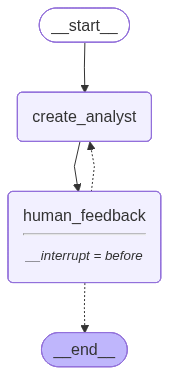

In [70]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [71]:
topic = "the benefits of adopting Langgraph as an agent framework"

In [72]:
max_analysts = 4

In [73]:
thread =  {"configurable":{"thread_id":1}}

In [74]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  
            
        

Name: Alice Chen
Affiliation: Independent AI Lab
Role: AI Research Scientist
Description: Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent interactions and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.
--------------------------------------------------
Name: Bob Johnson
Affiliation: Large Financial Institution
Role: Enterprise Architect
Description: Concerned with the practical benefits of Langgraph for enterprise applications. He evaluates Langgraph based on its scalability, reliability, and ease of integration with existing systems. His primary motive is to reduce development costs and improve the performance of AI-powered services within the institution.
--------------------------------------------------
Name: Charlie Davis
Affiliation: Non-profit AI Ethics Organization
Role: AI Ethics Consultant
Description: Examines the ethical implications 

In [75]:
state = graph.get_state(thread)

In [76]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent interactions and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'), Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. He evaluates Langgraph based on its scalability, reliability, and ease of integration with existing systems. His primary motive is to reduce development costs and improve the performance of AI-powered services within the institution.'), Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI 

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent interactions and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'), Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. He evaluates Langgraph based on its scalability, reliability, and ease of integration with existing systems. His primary motive is to reduce development costs and improve the performance of AI-powered services within the institution.'), Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI Ethics Organization', description='Examines the ethical implications of using Langgraph, particularly its potential to create more complex and opaque AI systems. He is motivated by ensuring that Langgraph is used responsibly and that its applications are aligned with ethical principles and societal values.'), Analyst(name='Diana Rodriguez', role='AI Product Manager', affiliation='Tech Startup', description='Interested in the product development aspects of Langgraph. She focuses on how Langgraph can be used to build innovative AI products and services, and how it compares to other agent frameworks in terms of usability and features. Her motive is to leverage Langgraph to gain a competitive advantage in the market.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b15d6-29ff-6f48-8001-efd384565dce'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-25T04:45:09.321300+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b15d5-f2c2-6a6b-8000-84a64b3dc570'}}, tasks=(PregelTask(id='09a13d18-9f63-b05a-5ec0-bbf25f742dc6', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())


StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Dr. Emily Chen', role='AI Framework Specialist', affiliation='Institute of Advanced AI Systems', description="Dr. Chen focuses on the technical advantages of adopting Langgraph as an agent framework. Her primary interest lies in how Langgraph enhances the efficiency and scalability of AI systems. She is particularly concerned with the framework's ability to integrate with existing technologies and its potential to streamline complex AI processes."), Analyst(name="Michael O'Neill", role='Enterprise Solutions Consultant', affiliation='Tech Innovations Inc.', description="Michael is interested in the business implications of adopting Langgraph. He explores how the framework can drive innovation and competitive advantage for enterprises. His focus is on cost-effectiveness, return on investment, and the framework's ability to support rapid deployment of AI solutions in various industries."), Analyst(name='Dr. Aisha Patel', role='Ethics and Compliance Analyst', affiliation='Global AI Ethics Consortium', description='Dr. Patel examines the ethical considerations and compliance aspects of using Langgraph. She is concerned with ensuring that the framework adheres to global standards for AI ethics and data privacy. Her analysis includes the potential risks and safeguards associated with deploying Langgraph in sensitive environments.'), Analyst(name='Carlos Ramirez', role='User Experience Researcher', affiliation='Human-Centric AI Lab', description='Carlos focuses on the user experience and accessibility of Langgraph. He investigates how the framework impacts the usability of AI systems for developers and end-users. His primary concern is ensuring that Langgraph is intuitive and accessible, promoting wider adoption and effective use across diverse user groups.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a1de3-2570-6c27-8001-9078a254da36'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-05T11:26:54.786256+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a1de2-fb55-6ac3-8000-c6b465b474b8'}}, tasks=(PregelTask(id='91c5d388-aa45-dddb-1ccb-71d005fa101b', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [77]:
state.next

('human_feedback',)

In [78]:
graph.update_state(thread,
                   {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                   )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0b1604-83f0-6c3b-8002-574f4d86cb7a'}}

In [ ]:
state = graph.get_state(thread)


In [80]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent interactions and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'), Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. He evaluates Langgraph based on its scalability, reliability, and ease of integration with existing systems. His primary motive is to reduce development costs and improve the performance of AI-powered services within the institution.'), Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI 

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Alice Chen', role='AI Research Scientist', affiliation='Independent AI Lab', description='Focuses on the technical advantages of Langgraph, such as its ability to manage complex agent interactions and improve the efficiency of multi-agent systems. She is motivated by the potential for Langgraph to advance the state of the art in AI research.'), Analyst(name='Bob Johnson', role='Enterprise Architect', affiliation='Large Financial Institution', description='Concerned with the practical benefits of Langgraph for enterprise applications. He evaluates Langgraph based on its scalability, reliability, and ease of integration with existing systems. His primary motive is to reduce development costs and improve the performance of AI-powered services within the institution.'), Analyst(name='Charlie Davis', role='AI Ethics Consultant', affiliation='Non-profit AI Ethics Organization', description='Examines the ethical implications of using Langgraph, particularly its potential to create more complex and opaque AI systems. He is motivated by ensuring that Langgraph is used responsibly and that its applications are aligned with ethical principles and societal values.'), Analyst(name='Diana Rodriguez', role='AI Product Manager', affiliation='Tech Startup', description='Interested in the product development aspects of Langgraph. She focuses on how Langgraph can be used to build innovative AI products and services, and how it compares to other agent frameworks in terms of usability and features. Her motive is to leverage Langgraph to gain a competitive advantage in the market.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b15d6-29ff-6f48-8001-efd384565dce'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-25T04:45:09.321300+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0b15d5-f2c2-6a6b-8000-84a64b3dc570'}}, tasks=(PregelTask(id='09a13d18-9f63-b05a-5ec0-bbf25f742dc6', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())


In [81]:
state.next

('human_feedback',)

In [88]:
thread =  {"configurable":{"thread_id":1}}

In [89]:
for event in graph.stream({"topic":topic,
              "max_analysts":max_analysts},
             thread,
             stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Ava Chen
Affiliation: InnovateAI
Role: Startup CTO
Description: Focuses on Langgraph's rapid prototyping and deployment capabilities for AI-powered startups. Concerned with minimizing development costs and maximizing speed to market. Motivated by the potential to disrupt traditional industries with innovative AI solutions.
--------------------------------------------------
Name: Liam O'Connell
Affiliation: GlobalTech Solutions
Role: Enterprise AI Architect
Description: Evaluates Langgraph's scalability and integration within large enterprise systems. Concerned with security, compliance, and ensuring seamless interoperability with existing infrastructure. Motivated by driving efficiency and ROI through enterprise-wide AI adoption.
--------------------------------------------------
Name: Dr. Maya Patel
Affiliation: AI Research Institute
Role: AI Research Scientist
Description: Interested in Langgraph's novel graph-based approach to agent orchestration and its potential for advancin

In [90]:
state = graph.get_state(thread)

In [91]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'None', 'analysts': [Analyst(name='Alice Lang', role='AIops Engineer', affiliation='Tech Solutions Inc.', description='Focuses on the operational efficiency and scalability gains from using Langgraph. Concerned with the ease of deployment, monitoring, and maintenance of Langgraph-based agents in production environments. Motivated by reducing infrastructure costs and improving system reliability.'), Analyst(name='Bob Grapher', role='AI Researcher', affiliation='University of Advanced AI', description='Explores the theoretical advantages of Langgraph in managing complex agent interactions. Interested in the graph-based representation for reasoning and knowledge management. Motivated by advancing the state-of-the-art in AI and publishing research findings.'), Analyst(name='Charlie Chain', role='Lead Developer', affiliation='Startup Innovations Ltd.', desc

In [92]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'None',
 'analysts': [Analyst(name='Alice Lang', role='AIops Engineer', affiliation='Tech Solutions Inc.', description='Focuses on the operational efficiency and scalability gains from using Langgraph. Concerned with the ease of deployment, monitoring, and maintenance of Langgraph-based agents in production environments. Motivated by reducing infrastructure costs and improving system reliability.'),
  Analyst(name='Bob Grapher', role='AI Researcher', affiliation='University of Advanced AI', description='Explores the theoretical advantages of Langgraph in managing complex agent interactions. Interested in the graph-based representation for reasoning and knowledge management. Motivated by advancing the state-of-the-art in AI and publishing research findings.'),
  Analyst(name='Charlie Chain', role='Lead Developer', affiliation='Startup Innovations Ltd.', description='Inter

In [93]:
state.next

('human_feedback',)

## Second Workflow

In [108]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [109]:
from dotenv import load_dotenv
load_dotenv()
import os
tavily_api_key = os.getenv("TAVILY_API_KEY")

In [110]:
tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)

C:\Users\CS\AppData\Local\Temp\ipykernel_29872\1029971610.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_search = TavilySearchResults(tavily_api_key=tavily_api_key)


In [111]:
tavily_search.invoke("langgraph")

[{'title': 'LangGraph overview - Docs by LangChain',
  'url': 'https://docs.langchain.com/oss/python/langgraph/overview',
  'content': 'Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.LangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.We will commonly use LangChain components throughout the',
  'score': 0.9314689},
 {'title': 'What is LangGraph?',
  'url': 'https://www.analyticsvidhya.com/blog/2024/07/langgraph-revolutionizing-ai-agent/',
  'content': 'To sum up, LangGraph is a major advancement in the development of AI agents. It enables developers to push the limits of what’s possible with AI agents by eliminating the shortcomings of earlier syste

In [139]:
from langchain_community.document_loaders import WikipediaLoader

docs = WikipediaLoader(query="LangGraph").load()
print(docs[0].page_content[:500])

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 


LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, 

In [143]:
import operator
from typing import  Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Search query for retrieval.")

In [144]:
question_instructions = """You are an analyst tasked with interviewing an expert to learn about a specific topic. 

Your goal is boil down to interesting and specific insights related to your topic.

1. Interesting: Insights that people will find surprising or non-obvious.
        
2. Specific: Insights that avoid generalities and include specific examples from the expert.

Here is your topic of focus and set of goals: {goals}
        
Begin by introducing yourself using a name that fits your persona, and then ask your question.

Continue to ask questions to drill down and refine your understanding of the topic.
        
When you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"

Remember to stay in character throughout your response, reflecting the persona and goals provided to you."""

In [145]:
print(analyst.persona)

Name: Diana Agent
Role: Security Architect
Affiliation: CyberGuard Systems
Description: Concerned with the security implications of using Langgraph, particularly around data privacy, access control, and vulnerability management in multi-agent systems. Motivated by ensuring the secure and ethical use of AI agents.



In [146]:
question_instructions.format(goals = analyst.persona)

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Diana Agent\nRole: Security Architect\nAffiliation: CyberGuard Systems\nDescription: Concerned with the security implications of using Langgraph, particularly around data privacy, access control, and vulnerability management in multi-agent systems. Motivated by ensuring the secure and ethical use of AI agents.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much

'You are an analyst tasked with interviewing an expert to learn about a specific topic. \n\nYour goal is boil down to interesting and specific insights related to your topic.\n\n1. Interesting: Insights that people will find surprising or non-obvious.\n\n2. Specific: Insights that avoid generalities and include specific examples from the expert.\n\nHere is your topic of focus and set of goals: Name: Diana Agent\nRole: Security Architect\nAffiliation: CyberGuard Systems\nDescription: Concerned with the security implications of using Langgraph, particularly around data privacy, access control, and vulnerability management in multi-agent systems. Motivated by ensuring the secure and ethical use of AI agents.\n\n\nBegin by introducing yourself using a name that fits your persona, and then ask your question.\n\nContinue to ask questions to drill down and refine your understanding of the topic.\n\nWhen you are satisfied with your understanding, complete the interview with: "Thank you so much for your help!"\n\nRemember to stay in character throughout your response, reflecting the persona and goals provided to you.'

In [147]:
def generation_question(state:InterviewState):
    """Node to generate the questions"""
    
    #get state
    analyst = state["analyst"]
    messages = state["messages"]
    
    #generate the question
    system_message = question_instructions.format(goals = analyst.persona)
    question = llm.invoke([SystemMessage(content=system_message)]+messages)
    
    #returen the question through state
    return {"messages":[question]}

In [148]:
from langchain_core.messages import get_buffer_string

In [149]:
# Search query writing
search_instructions = SystemMessage(content=f"""You will be given a conversation between an analyst and an expert. 
Your goal is to generate a well-structured query for use in retrieval and / or web-search related to the conversation. 
First, analyze the full conversation.
Pay particular attention to the final question posed by the analyst.
Convert this final question into a well-structured web search query""")

In [150]:
def search_web(state:InterviewState):
    """
    Retrieve data from the web
    """
    structure_llm = llm.with_structured_output(SearchQuery)
    search_query = structure_llm.invoke([search_instructions]+state["messages"])
    
    # Search
    search_docs = tavily_search.invoke(search_query.search_query)
    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document href="{doc["url"]}"/>\n{doc["content"]}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

In [122]:
def search_wikipedia(state:InterviewState):
    """
    Retrieve data from wiki
    """
    # Search query
    structured_llm = llm.with_structured_output(SearchQuery)
    search_query = structured_llm.invoke([search_instructions]+state['messages'])
    
    # Search
    search_docs = WikipediaLoader(query=search_query.search_query, 
                                  load_max_docs=2).load()

     # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]} 
    

In [151]:
answer_instructions = """You are an expert being interviewed by an analyst.

Here is analyst area of focus: {goals}. 
        
You goal is to answer a question posed by the interviewer.

To answer question, use this context:
        
{context}

When answering questions, follow these guidelines:
        
1. Use only the information provided in the context. 
        
2. Do not introduce external information or make assumptions beyond what is explicitly stated in the context.

3. The context contain sources at the topic of each individual document.

4. Include these sources your answer next to any relevant statements. For example, for source # 1 use [1]. 

5. List your sources in order at the bottom of your answer. [1] Source 1, [2] Source 2, etc
        
6. If the source is: <Document source="assistant/docs/llama3_1.pdf" page="7"/>' then just list: 
        
[1] assistant/docs/llama3_1.pdf, page 7 
        
And skip the addition of the brackets as well as the Document source preamble in your citation."""

In [124]:
def generate_answer(state:InterviewState):
   
    """ Node to answer a question """

    # Get state
    analyst = state["analyst"]
    messages = state["messages"]
    context = state["context"]

    # Answer question
    system_message = answer_instructions.format(goals=analyst.persona, context=context)
    answer = llm.invoke([SystemMessage(content=system_message)]+messages)
            
    # Name the message as coming from the expert
    answer.name = "expert"
    
    # Append it to state
    return {"messages": [answer]}
    

In [152]:
def route_messages(state: InterviewState, 
                   name: str = "expert"):

    """ Route between question and answer """
    
    # Get messages
    messages = state["messages"]
    max_num_turns = state.get('max_num_turns',2)

    # Check the number of expert answers 
    num_responses = len(
        [m for m in messages if isinstance(m, AIMessage) and m.name == name]
    )

    # End if expert has answered more than the max turns
    if num_responses >= max_num_turns:
        return 'save_interview'

    # This router is run after each question - answer pair 
    # Get the last question asked to check if it signals the end of discussion
    last_question = messages[-2]
    
    if "Thank you so much for your help" in last_question.content:
        return 'save_interview'
    
    return "ask_question"

In [126]:
def save_interview(state: InterviewState):
    
    """ Save interviews """

    # Get messages
    messages = state["messages"]
    
    # Convert interview to a string
    interview = get_buffer_string(messages)
    
    # Save to interviews key
    return {"interview": interview}

In [153]:
section_writer_instructions = """You are an expert technical writer. 
            
Your task is to create a short, easily digestible section of a report based on a set of source documents.

1. Analyze the content of the source documents: 
- The name of each source document is at the start of the document, with the <Document tag.
        
2. Create a report structure using markdown formatting:
- Use ## for the section title
- Use ### for sub-section headers
        
3. Write the report following this structure:
a. Title (## header)
b. Summary (### header)
c. Sources (### header)

4. Make your title engaging based upon the focus area of the analyst: 
{focus}

5. For the summary section:
- Set up summary with general background / context related to the focus area of the analyst
- Emphasize what is novel, interesting, or surprising about insights gathered from the interview
- Create a numbered list of source documents, as you use them
- Do not mention the names of interviewers or experts
- Aim for approximately 400 words maximum
- Use numbered sources in your report (e.g., [1], [2]) based on information from source documents
        
6. In the Sources section:
- Include all sources used in your report
- Provide full links to relevant websites or specific document paths
- Separate each source by a newline. Use two spaces at the end of each line to create a newline in Markdown.
- It will look like:

### Sources
[1] Link or Document name
[2] Link or Document name

7. Be sure to combine sources. For example this is not correct:

[3] https://ai.meta.com/blog/meta-llama-3-1/
[4] https://ai.meta.com/blog/meta-llama-3-1/

There should be no redundant sources. It should simply be:

[3] https://ai.meta.com/blog/meta-llama-3-1/
        
8. Final review:
- Ensure the report follows the required structure
- Include no preamble before the title of the report
- Check that all guidelines have been followed"""

In [128]:
def write_section(state: InterviewState):

    """ Node to answer a question """

    # Get state
    interview = state["interview"]
    context = state["context"]
    analyst = state["analyst"]
   
    # Write section using either the gathered source docs from interview (context) or the interview itself (interview)
    system_message = section_writer_instructions.format(focus=analyst.description)
    section = llm.invoke([SystemMessage(content=system_message)]+[HumanMessage(content=f"Use this source to write your section: {context}")]) 
                
    # Append it to state
    return {"sections": [section.content]}


In [155]:
interview_builder = StateGraph(InterviewState)

In [156]:
interview_builder.add_node("ask_question",generation_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)

In [159]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           router_messages,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.
Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


ValueError: Branch with name `router_messages` already exists for node `generate_answer`

In [160]:
interview_graph = interview_builder.compile(checkpointer=memory).with_config(run_name = "Conduct Interview")

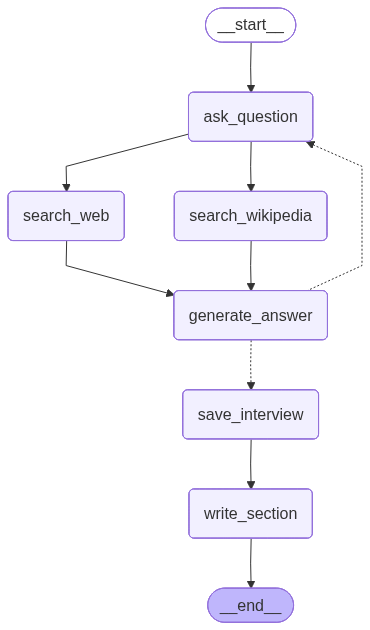

In [161]:
display(Image(interview_graph.get_graph().draw_mermaid_png()))

## third Workflow